# <center> Projeto 01 - Unidade II </center>

Seja o sistema dinâmico dado pela seguinte função não linear:

$$ 
y[n] = f\left(y[n - 1],\, y[n - 2],\, u[n],\, u[n - 1]\right)
$$

cujo conjunto entrada / saídas é apresentado na tabela *dados.txt*. Implemente um identificador via **Método dos Mínimos Quadrados** e a **combinação linear de funções de base radial - RBF**. 

No projeto utilize:
* 500 amostras para o treinamento
* 500 amostras para o teste e,
* 500 amostras para validar o modelo.

Compare os resultados obtidos utilizando como métricas o **Erro Médio Quadrático** e o **Coeficiente de Correlação de Pearson** (ver Lab 04). Apresente conclusões.

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from numpy.linalg import pinv
from scipy.stats import linregress, pearsonr

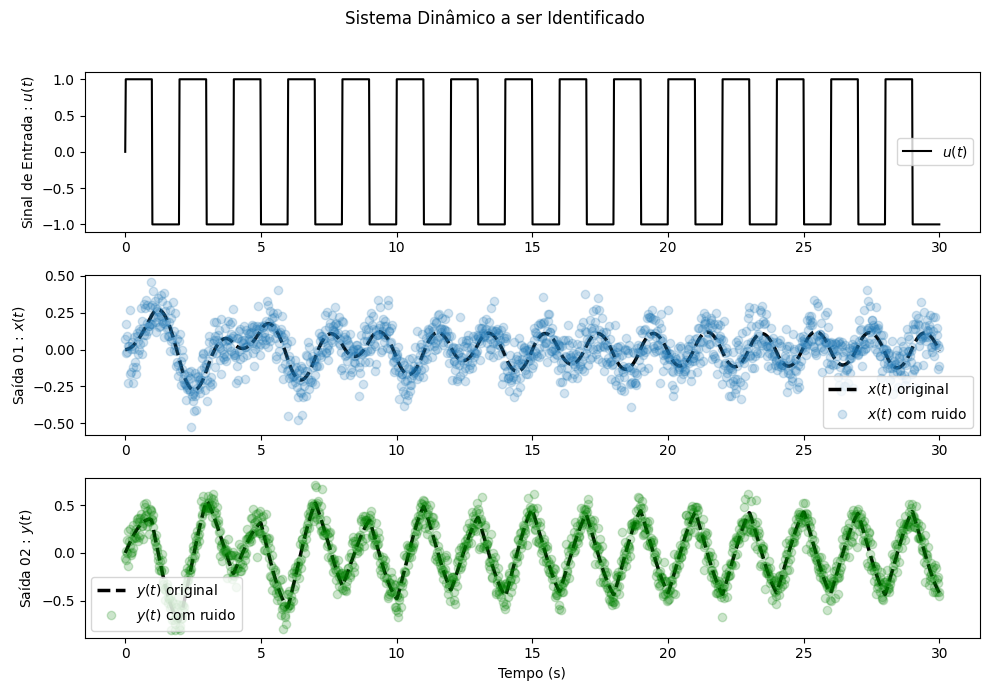

In [124]:
data = np.loadtxt('dados.txt', delimiter=',', skiprows=1)

t = data[:, 0] #tempo
u = data[:, 1] #entrada

x = data[:, 2] #saida c/ ruido (utilizar para treinar)
y = data[:, 3] #saida c/ ruido (utilizar para treinar)

x1 = data[:, 4] #saida s/ ruido
y1 = data[:, 5] #saida s/ ruido

# Plot results of simulation
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(t, u, label='$u(t)$', color='k')
plt.ylabel('Sinal de Entrada : $u(t)$')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, x1, '--k', lw = 2.5, label='$x(t)$ original')
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y1, '--k', lw = 2.5, label='$y(t)$ original')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()

plt.suptitle('Sistema Dinâmico a ser Identificado')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

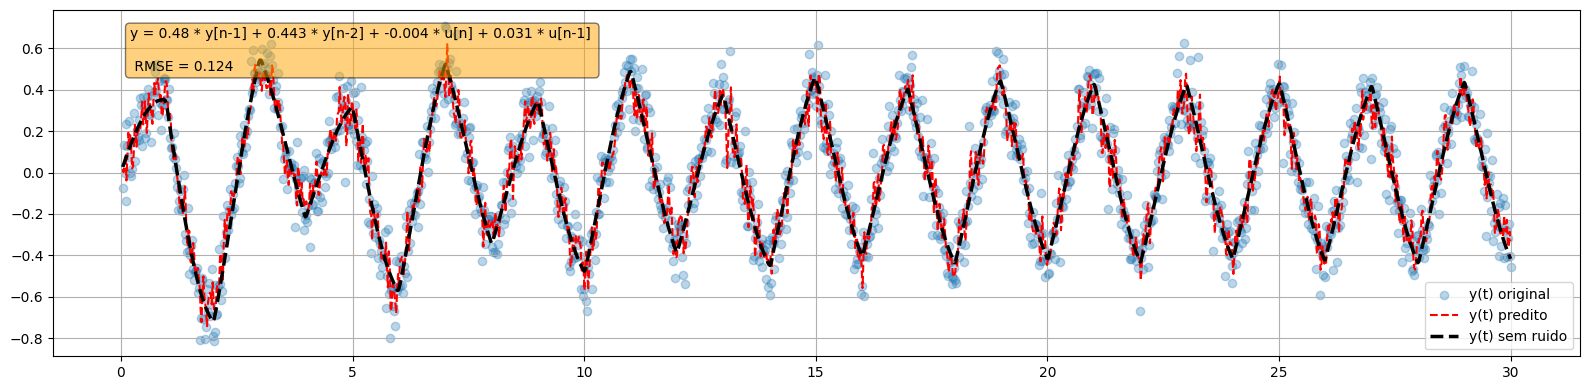

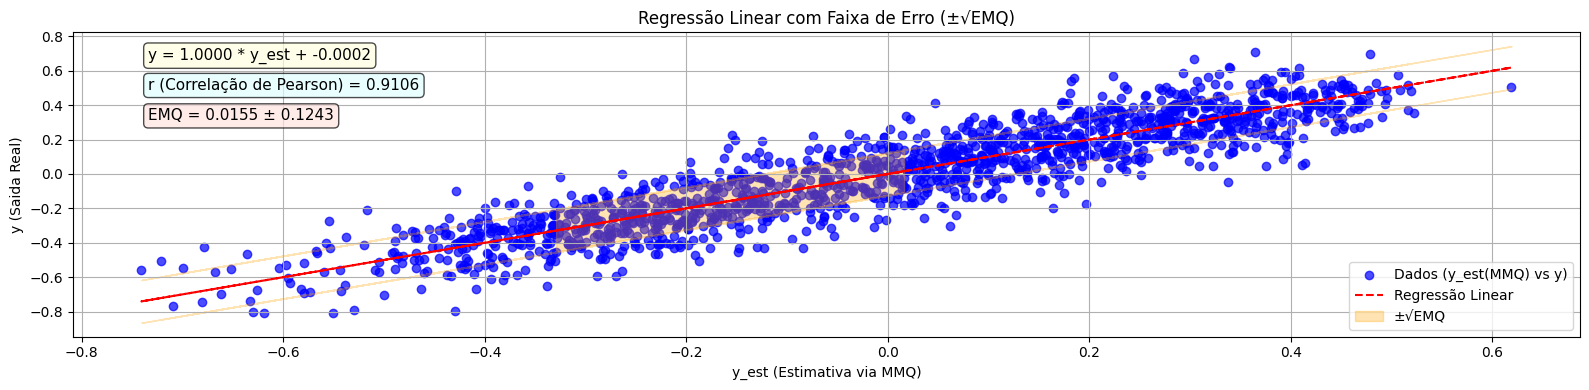

In [126]:
#Ajustando para y via MMQ
#Numero de dados para treinar
n = 500

t = data[2:, 0] #tempo
u = data[2:, 1] #entrada
U1 = data[1:-1, 1] #u[n-1] 

y = data[2:, 3] #saida
Y1 = data[1:-1, 3] #y[n-1]
Y2 = data[:-2, 3] #y[n-2]

#print(Y1.shape)
#print(Y2.shape)
#print(u.shape)
#print(U1.shape)

Y = np.column_stack((Y1, Y2, u, U1))

#w = (la.inv(X.T@X))@X.T@y
w = la.pinv(Y) @ y
y_est = Y@w

EMQY = np.mean((y - y_est) ** 2)
RMSE = np.sqrt(np.mean((y_est - y) ** 2))

modelo = (f"y = {w[0]:.2f} * y[n-1] + {w[1]:.3f} * y[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSE:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, y, alpha = 0.3, label = "y(t) original")
plt.plot(t, y_est,'--r', label = "y(t) predito")
plt.plot(t, y1[2:], '--k', lw = 2.5, label = "y(t) sem ruido")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))
plt.tight_layout()
plt.show()

#Calculando correlacao de pearson

a, b, r_val, p_val, std_err = linregress(y_est, y)
corr, _ = pearsonr(y_est, y)
y_reg = a * y_est + b

plt.figure(figsize=(16, 4))
plt.scatter(y_est, y, alpha = 0.7, label = 'Dados (y_est(MMQ) vs y)', color = 'blue')
plt.plot(y_est, y_reg, '--r', label = 'Regressão Linear')

plt.fill_between(y_est, y_reg - RMSE, y_reg + RMSE, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"y = {a:.4f} * y_est + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr:.4f}"
emq_text = f"EMQ = {EMQY:.4f} ± {RMSE:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("y_est (Estimativa via MMQ)")
plt.ylabel("y (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


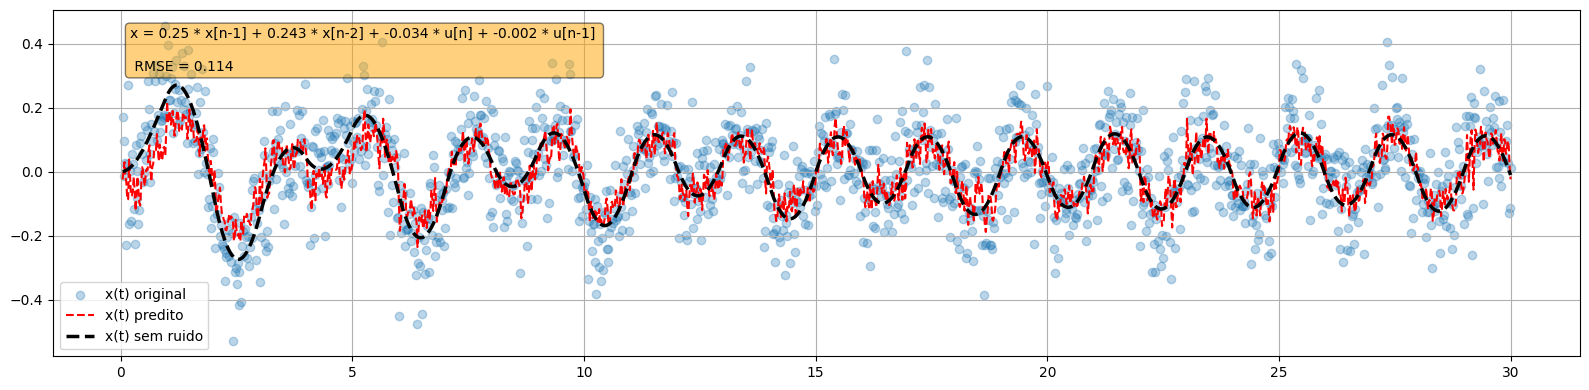

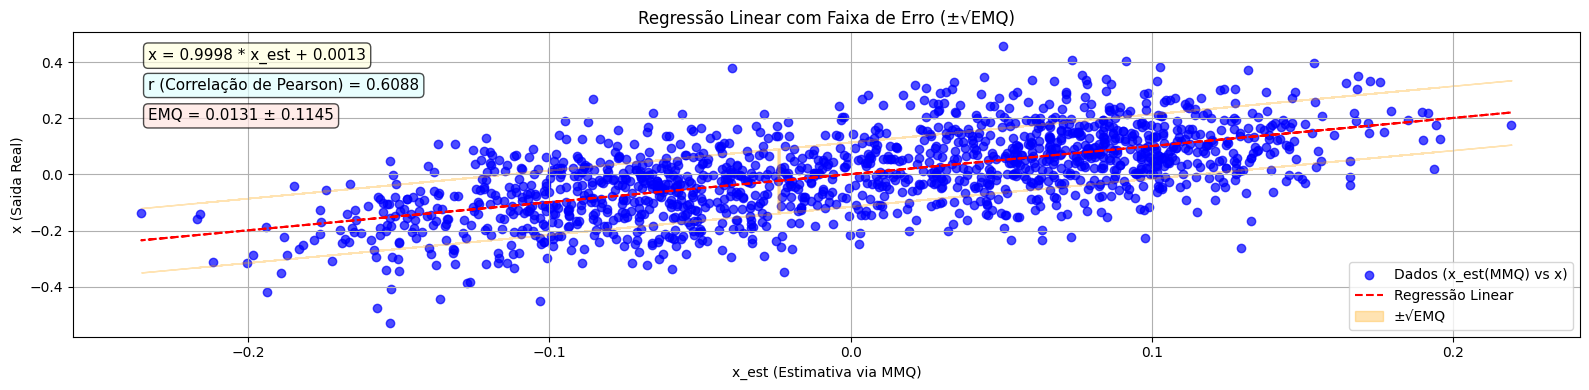

In [127]:
#Ajustando para x via MMQ

#Numero de dados para treinar
n = 500

t = data[2:, 0] #tempo
u = data[2:, 1] #entrada
U1 = data[1:-1, 1] #u[n-1]

x = data[2:, 2] #saida
X1 = data[1:-1, 2] #x[n-1]
X2 = data[:-2, 2] #x[n-2]

#print(X1.shape)
#print(X2.shape)
#print(u.shape)
#print(U1.shape)

X = np.column_stack((X1, X2, u, U1))

#w = (la.inv(X.T@X))@X.T@x
w = la.pinv(X) @ x
x_est = X@w

EMQX = np.mean((x - x_est) ** 2)
RMSE = np.sqrt(np.mean((x_est - x) ** 2))

modelo = (f"x = {w[0]:.2f} * x[n-1] + {w[1]:.3f} * x[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSE:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, x, alpha = 0.3, label = "x(t) original")
plt.plot(t, x_est,'--r', label = "x(t) predito")
plt.plot(t, x1[2:], '--k', lw = 2.5, label = "x(t) sem ruido")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

plt.tight_layout()
plt.show()
  
a, b, r_val, p_val, std_err = linregress(x_est, x)
corr, _ = pearsonr(x_est, x)
x_reg = a * x_est + b

plt.figure(figsize=(16, 4))
plt.scatter(x_est, x, alpha = 0.7, label = 'Dados (x_est(MMQ) vs x)', color = 'blue')
plt.plot(x_est, x_reg, '--r', label = 'Regressão Linear')

plt.fill_between(x_est, x_reg - RMSE, x_reg + RMSE, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"x = {a:.4f} * x_est + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr:.4f}"
emq_text = f"EMQ = {EMQX:.4f} ± {RMSE:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("x_est (Estimativa via MMQ)")
plt.ylabel("x (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


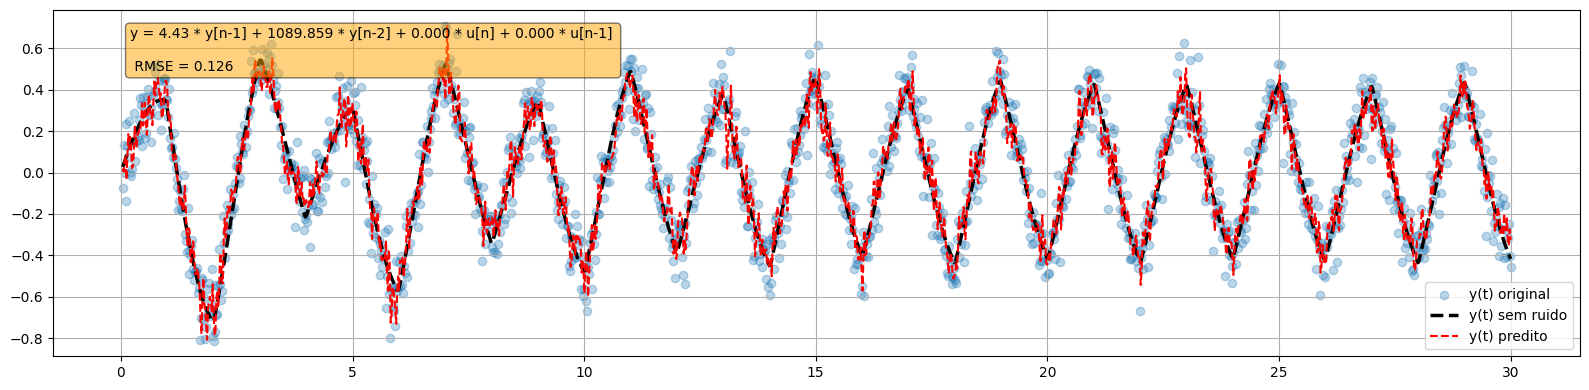

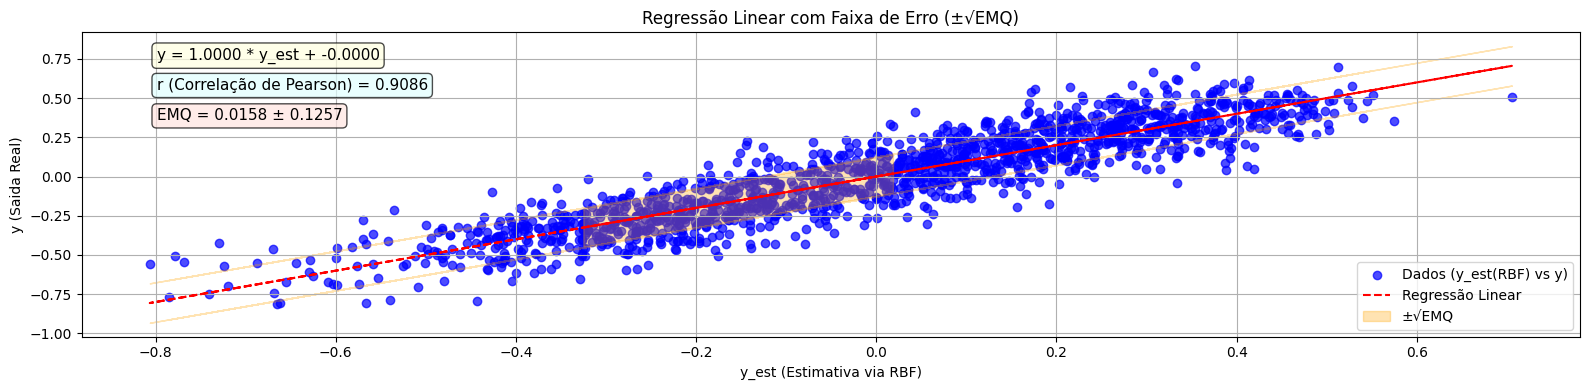

In [128]:
#Ajustando para y via RBF
#y[n] = w0 * g(y[n-1]) + w1 * g(y[n-2]) + w2 * g(u[n]) + w3 * g(u[n-1])

t = data[2:, 0] #tempo
u = data[2:, 1] #entrada
U1 = data[1:-1, 1] #u[n-1] 

y = data[2:, 3] #saida
Y1 = data[1:-1, 3] #y[n-1]
Y2 = data[:-2, 3] #y[n-2]

c = np.linspace(t[0], t[-1], 4)
s2 = 3

phi_Y1 = np.exp(-((Y1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_Y2 = np.exp(-((Y2[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_u = np.exp(-((u[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_U1 = np.exp(-((U1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))

Y = np.column_stack((phi_Y1, phi_Y2, phi_u, phi_U1))

#print(la.pinv(Y).shape)
w = la.pinv(Y) @ y

y_est = Y @ w

EMQY = np.mean((y - y_est) ** 2)
RMSE = np.sqrt(np.mean((y_est - y) ** 2))

modelo = (f"y = {w[0]:.2f} * y[n-1] + {w[1]:.3f} * y[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSE:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, y, alpha = 0.3, label = "y(t) original")
plt.plot(t, y1[2:], '--k', lw = 2.5, label = "y(t) sem ruido")
plt.plot(t, y_est,'--r', label = "y(t) predito")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))
plt.tight_layout()
plt.show()

#Calculando correlacao de pearson

a, b, r_val, p_val, std_err = linregress(y_est, y)
corr, _ = pearsonr(y_est, y)
y_reg = a * y_est + b

plt.figure(figsize=(16, 4))
plt.scatter(y_est, y, alpha = 0.7, label = 'Dados (y_est(RBF) vs y)', color = 'blue')
plt.plot(y_est, y_reg, '--r', label = 'Regressão Linear')

plt.fill_between(y_est, y_reg - RMSE, y_reg + RMSE, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"y = {a:.4f} * y_est + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr:.4f}"
emq_text = f"EMQ = {EMQY:.4f} ± {RMSE:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("y_est (Estimativa via RBF)")
plt.ylabel("y (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


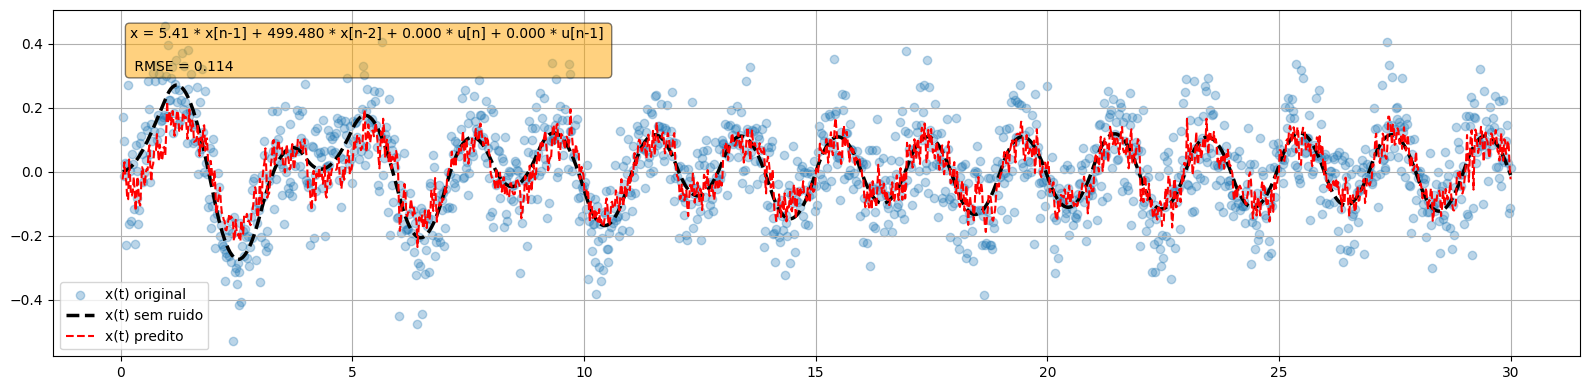

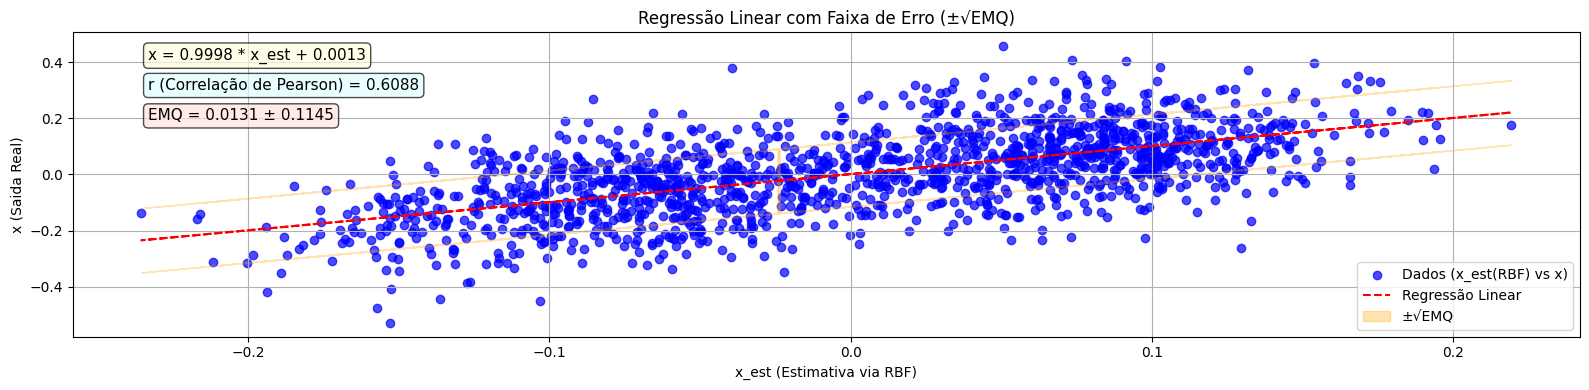

In [129]:
#Ajustando para x via RBF
#x[n] = w0 * g(x[n-1]) + w1 * g(x[n-2]) + w2 * g(u[n]) + w3 * g(u[n-1])

#Numero de dados para treinar
n = 500

t = data[2:, 0] #tempo
u = data[2:, 1] #entrada
U1 = data[1:-1, 1] #u[n-1]

x = data[2:, 2] #saida
X1 = data[1:-1, 2] #x[n-1]
X2 = data[:-2, 2] #x[n-2]

c = np.linspace(t[0], t[-1], 4)
s2 = 3

phi_X1 = np.exp(-((X1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_X2 = np.exp(-((X2[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_u = np.exp(-((u[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
phi_U1 = np.exp(-((U1[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))

X = np.column_stack((phi_X1, phi_X2, phi_u, phi_U1))

#print(la.pinv(X).shape)
w = la.pinv(X) @ y

y_est = X @ w

EMQX = np.mean((x - x_est) ** 2)
RMSE = np.sqrt(np.mean((x_est - x) ** 2))

modelo = (f"x = {w[0]:.2f} * x[n-1] + {w[1]:.3f} * x[n-2] + {w[2]:.3f} * u[n] + {w[3]:.3f} * u[n-1] \n\n RMSE = {RMSE:.3f}")

plt.figure(figsize=(16,4))
plt.scatter(t, x, alpha = 0.3, label = "x(t) original")
plt.plot(t, x1[2:], '--k', lw = 2.5, label = "x(t) sem ruido")
plt.plot(t, x_est,'--r', label = "x(t) predito")
plt.grid()
plt.legend()
plt.gca().text(0.05, 0.95, modelo, transform=plt.gca().transAxes,
               fontsize=10, verticalalignment='top', 
               bbox=dict(boxstyle='round', facecolor='orange', alpha=0.5))

plt.tight_layout()
plt.show()
  
a, b, r_val, p_val, std_err = linregress(x_est, x)
corr, _ = pearsonr(x_est, x)
x_reg = a * x_est + b

plt.figure(figsize=(16, 4))
plt.scatter(x_est, x, alpha = 0.7, label = 'Dados (x_est(RBF) vs x)', color = 'blue')
plt.plot(x_est, x_reg, '--r', label = 'Regressão Linear')

plt.fill_between(x_est, x_reg - RMSE, x_reg + RMSE, color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"x = {a:.4f} * x_est + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr:.4f}"
emq_text = f"EMQ = {EMQX:.4f} ± {RMSE:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("x_est (Estimativa via RBF)")
plt.ylabel("x (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
